### Import Libraries

In [2]:
import os
import glob

import cv2
import numpy as np

import matplotlib.pyplot as plt

from utilities import AITEX


### Define Paths

In [3]:
root = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_dir = os.path.join(root, "data")
aitex_dir = os.path.join(data_dir, "aitex")

### Test Reading in Masks

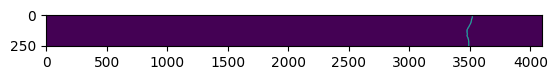

In [4]:
test_mask = os.path.join(aitex_dir, "Mask_images", "0001_002_00_mask.png")

img = cv2.imread(test_mask, cv2.IMREAD_GRAYSCALE)
# masks aren't binary, threshold to binarize
_, img_binary = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY)

plt.imshow(img_binary)

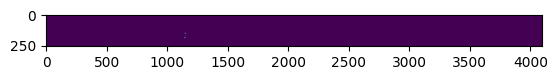

In [5]:
# duplicate masks noticed, let's see what is happening

mask1 = cv2.imread(os.path.join(aitex_dir, "Mask_images", "0044_019_04_mask1.png"), cv2.IMREAD_GRAYSCALE)
mask2 = cv2.imread(os.path.join(aitex_dir, "Mask_images", "0044_019_04_mask2.png"), cv2.IMREAD_GRAYSCALE)

np.array_equal(mask1, mask2)

plt.imshow(mask1 + mask2)

# masks appear to be validly identifying multiple defects of the same type in the same image
# we can combine them for modeling purposes (specifically segmentation)

In [6]:
# there's only two images that fall into this scenario so we can just do this manually
multi_masks = ["0044_019_04", "0097_030_03"]
for base_img in multi_masks:
    mask1 = cv2.imread(os.path.join(aitex_dir, "Mask_images", f"{base_img}_mask1.png"), cv2.IMREAD_GRAYSCALE)
    mask2 = cv2.imread(os.path.join(aitex_dir, "Mask_images", f"{base_img}_mask2.png"), cv2.IMREAD_GRAYSCALE)

    combined_mask = mask1 + mask2
    cv2.imwrite(os.path.join(aitex_dir, "Mask_images", f"{base_img}_mask.png"), combined_mask)

### Helpers

In [7]:
image_dims = (256, 4096)

defect_codes = {
    0: "Normal",
    2:	"Broken end",
    6:	"Broken yarn",
    10:	"Broken pick",
    16:	"Weft curling",
    19:	"Fuzzyball",
    22:	"Cut selvage",
    23:	"Crease",
    25:	"Warp ball",
    27:	"Knots",
    29:	"Contamination",
    30: "Nep",
    36:	"Weft crack",
}
        
    
        

### Read and Explore Data

In [8]:
data = AITEX(aitex_dir)

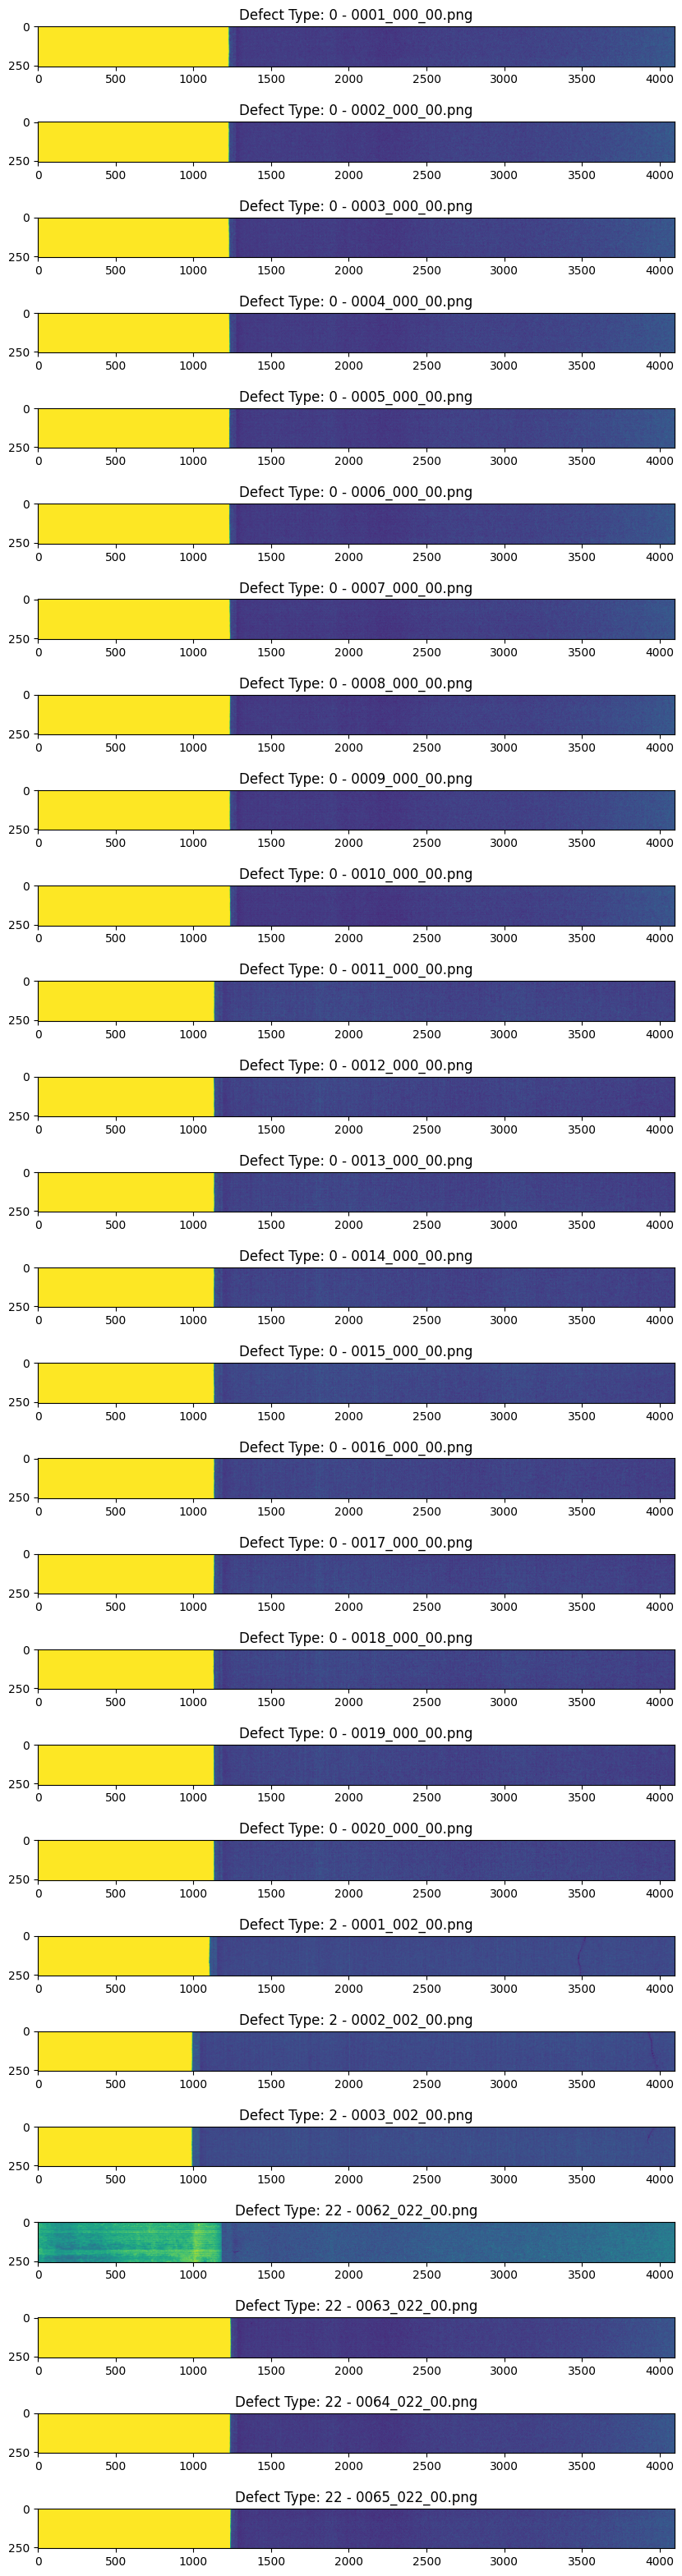

In [9]:
images_zero, masks_zero, classes_zero, paths_zero = data.get_by_type(0)
paths_zero = [x.split('\\')[-1] for x in paths_zero]
num_images = len(images_zero)

fig, ax = plt.subplots(num_images, figsize=(10, num_images * 1.5))

for i in range(0, num_images):
    ax[i].imshow(images_zero[i])
    ax[i].title.set_text(f"Defect Type: {classes_zero[i]} - {paths_zero[i]}")

Visualize Class Normal for Fabric Type 0


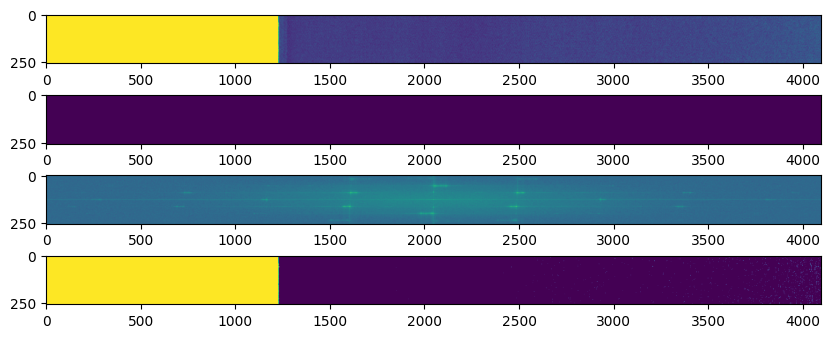

In [10]:
img, mask, class_label, path, fabric_type = data[81]
img_fourier = np.log(abs(np.fft.fftshift(np.fft.fft2(img))))
_, threshed = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

print(f"Visualize Class {defect_codes[class_label]} for Fabric Type {fabric_type}")

fig, ax = plt.subplots(4, figsize=(10,4))
ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(img_fourier)
ax[3].imshow(threshed)

Visualize Class Fuzzyball for Fabric Type 4


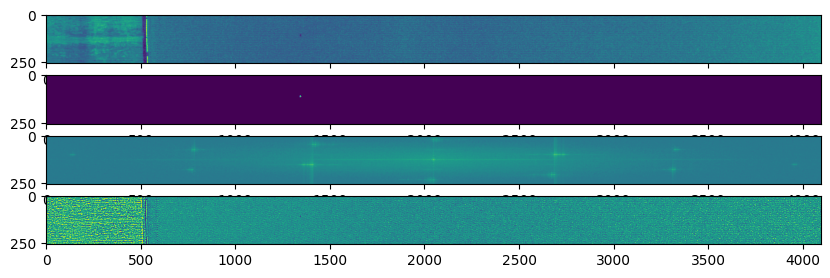

In [53]:
img, mask, class_label, path, fabric_type = data[180]
img_fourier_defect = np.log(abs(np.fft.fftshift(np.fft.fft2(img))))
# _, threshed = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
threshed = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

print(f"Visualize Class {defect_codes[class_label]} for Fabric Type {fabric_type}")

fig, ax = plt.subplots(4, figsize=(10,3))
ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(img_fourier_defect)
ax[3].imshow(threshed)

In [55]:
np.amax(adjusted)

255

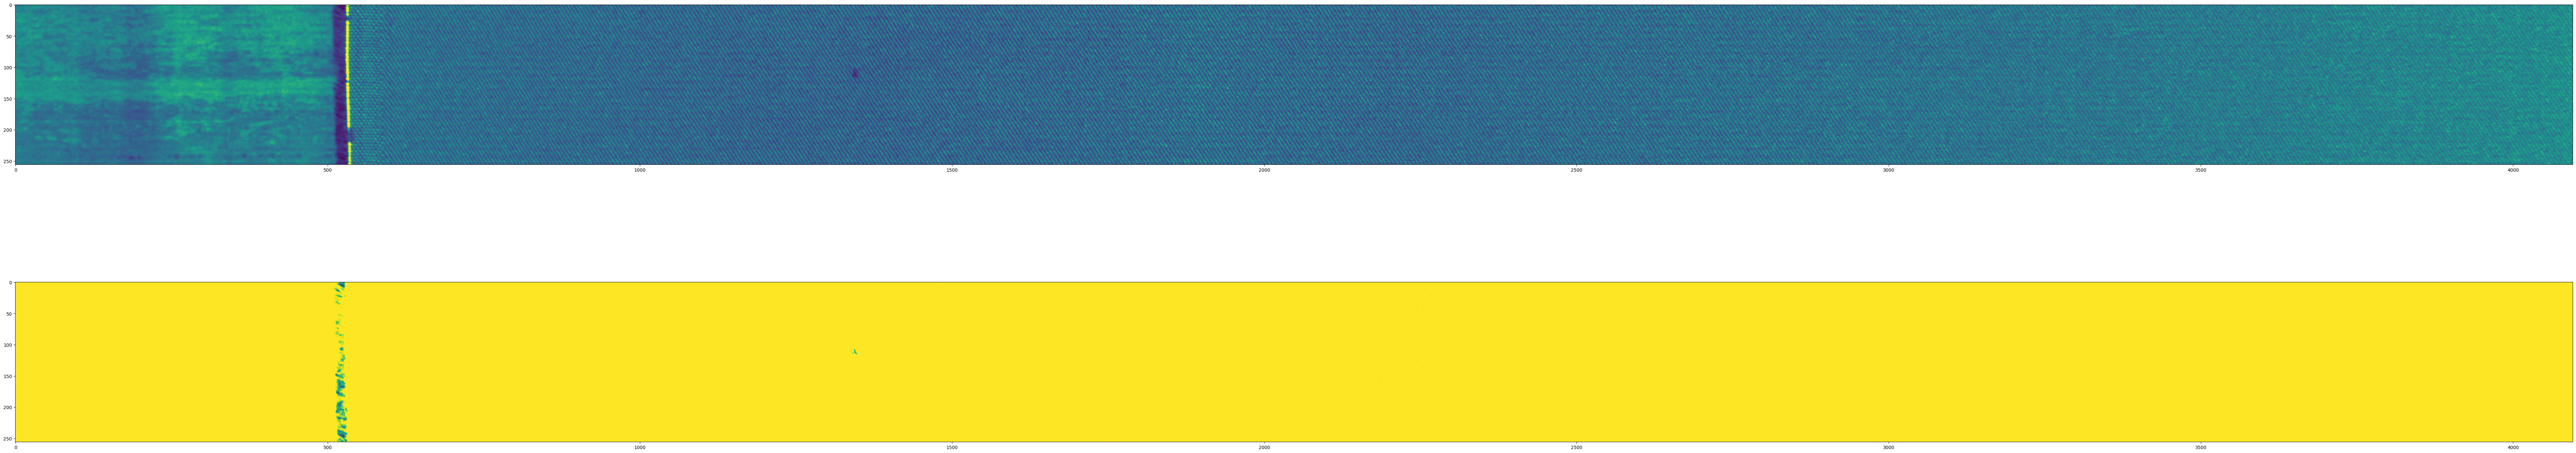

In [54]:
fig, ax = plt.subplots(2, figsize=(100,20))
alpha = 2.5
beta = 60
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
ax[0].imshow(img)
ax[1].imshow(adjusted)

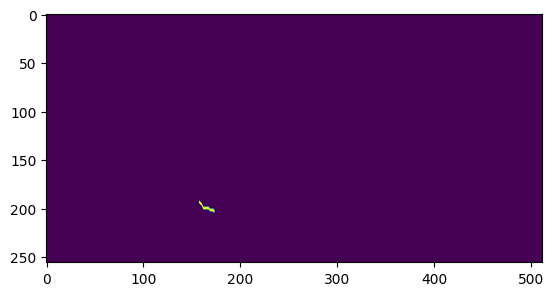

In [37]:
plt.imshow(cv2.resize(mask, (512, 256)))

In [50]:
img80, mask, class_label, path, fabric_type = data[80]
img_80 = np.log(abs(np.fft.fftshift(np.fft.fft2(img80))))

In [51]:
img81, mask, class_label, path, fabric_type = data[81]
img_81 = np.log(abs(np.fft.fftshift(np.fft.fft2(img81))))

In [52]:
imgdef, mask, class_label, path, fabric_type = data[201]
img_def = np.log(abs(np.fft.fftshift(np.fft.fft2(imgdef))))

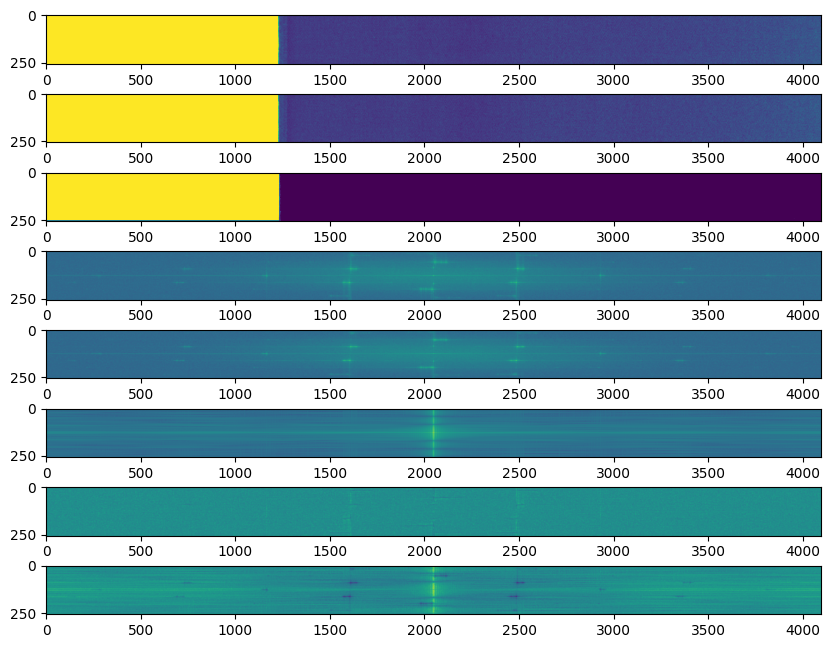

In [53]:
fig, ax = plt.subplots(8, figsize=(10, 8))

ax[0].imshow(img80)
ax[1].imshow(img81)
ax[2].imshow(imgdef)
ax[3].imshow(img_80)
ax[4].imshow(img_81)
ax[5].imshow(img_def)
ax[6].imshow(img_80 - img_81)
ax[7].imshow(img_def - img_81)

(array([5.00000e+01, 6.40000e+02, 7.59000e+03, 8.48560e+04, 4.78969e+05,
        4.09845e+05, 6.07980e+04, 5.38400e+03, 4.08000e+02, 3.60000e+01]),
 array([-6.19584604, -4.94127909, -3.68671215, -2.43214521, -1.17757826,
         0.07698868,  1.33155563,  2.58612257,  3.84068952,  5.09525646,
         6.3498234 ]),
 <BarContainer object of 10 artists>)

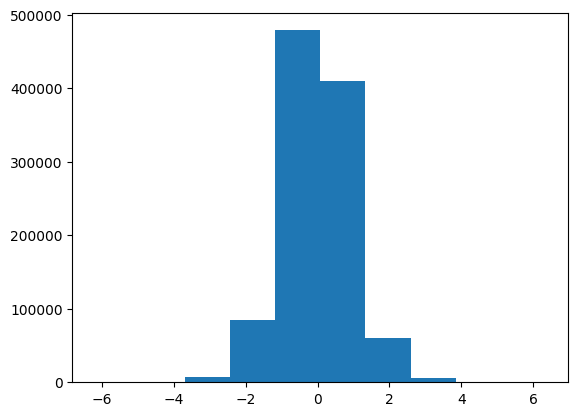

In [54]:
plt.hist((img_80 - img_81).flatten())

In [57]:
images_zero, masks_zero, classes_zero, paths_zero = data.get_by_type(0)


for index, img in enumerate(images_zero):
    print(index, classes_zero[index], np.mean(img), np.std(img))

0 0 127.9756908416748 84.35126213639721
1 0 128.68602848052979 83.93035797135084
2 0 128.92958068847656 83.82863349717968
3 0 128.19564247131348 84.39188329534196
4 0 128.882493019104 83.97256704315429
5 0 128.9681100845337 83.9408990657932
6 0 128.05282974243164 84.58793407323498
7 0 128.33694171905518 84.44658219821018
8 0 128.72282314300537 84.20188834119034
9 0 128.25044918060303 84.53493890967148
10 0 127.99265575408936 79.95275510511595
11 0 127.997633934021 79.8850458906744
12 0 127.1951551437378 80.34603411761103
13 0 128.40363025665283 79.60817911968408
14 0 128.2731170654297 79.70028578948909
15 0 127.33249473571777 80.2587779882577
16 0 128.5666618347168 79.52883167802176
17 0 128.74556922912598 79.35574546074105
18 0 127.30983066558838 80.22467743658379
19 0 127.95987701416016 79.88549346496434
20 2 128.72174644470215 78.21580673550966
21 2 127.83182907104492 73.70757377312606
22 2 128.49130249023438 73.32057982295304
23 22 125.51978397369385 36.92801521998977
24 22 127.620